In [1]:
import pandas as pd
from pathlib import Path

streams_features_file = r"/Users/James/Documents/Python/Machine Learning Projects/Spotify_Listening_Analysis/Spotify 2.0/preprocessing/pickles/my_features.pkl"
streams_features_raw = pd.read_pickle(streams_features_file)
streams_features = streams_features_raw.copy()


columns_to_drop = ["type", "id", "uri", "track_href", "analysis_url", "time_signature"]
streams_features.drop(columns_to_drop, inplace=True, axis=1)


def convert_duration(dataframe=streams_features):
    dataframe["duration"] = dataframe["duration_ms"].divide(60000)
    dataframe.drop("duration_ms", axis=1, inplace=True)
    return dataframe


def add_play_count(dataframe=streams_features):
    dataframe["playCount"] = dataframe["minutesTotal"] / dataframe["duration"]
    return dataframe


streams_features = convert_duration(streams_features)
streams_features = add_play_count(streams_features)

streams_features = streams_features[
    (streams_features["artistName"] != "John Mayer")
    & (streams_features["trackName"] != "On The Way Home")
]  # this one song has an incorrect duration and is returning a 30+ play count, definitely something not right


/Users/James/.pyenv/versions/3.8.5/envs/ml_env/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
streams_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8443 entries, 0 to 8454
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artistName        8443 non-null   object 
 1   trackName         8443 non-null   object 
 2   minutesTotal      8443 non-null   float64
 3   trackId           8443 non-null   object 
 4   danceability      8443 non-null   float64
 5   energy            8443 non-null   float64
 6   key               8443 non-null   int64  
 7   loudness          8443 non-null   float64
 8   mode              8443 non-null   int64  
 9   speechiness       8443 non-null   float64
 10  acousticness      8443 non-null   float64
 11  instrumentalness  8443 non-null   float64
 12  liveness          8443 non-null   float64
 13  valence           8443 non-null   float64
 14  tempo             8443 non-null   float64
 15  duration          8443 non-null   float64
 16  playCount         8443 non-null   float64


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='playCount', ylabel='Count'>

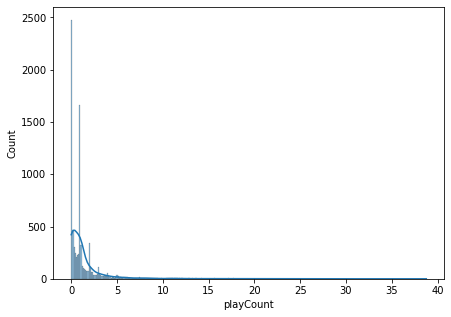

In [18]:
fig, ax = plt.subplots(figsize=(7,5));
sns.histplot(data = streams_features, x = "playCount", stat = "count", kde = True)

In [28]:
corr_matrix = streams_features.corr()
corr_matrix["playCount"].sort_values(ascending=False)

playCount           1.000000
minutesTotal        0.930574
acousticness        0.051570
mode                0.028920
instrumentalness    0.006403
key                 0.005438
duration            0.003712
valence            -0.022217
tempo              -0.023335
liveness           -0.036176
loudness           -0.052050
energy             -0.055950
danceability       -0.063091
speechiness        -0.067522
Name: playCount, dtype: float64

<AxesSubplot:>

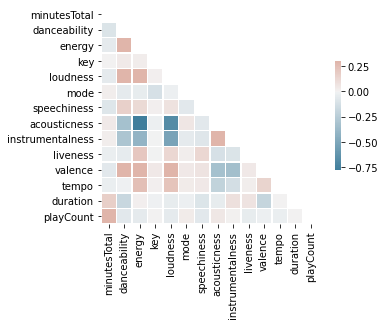

In [23]:
import numpy as np
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [24]:
corr_matrix

,minutesTotal,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,playCount
minutesTotal,1.000000,-0.092784,-0.051725,0.005427,-0.052993,0.021634,-0.079944,0.037426,0.022290,-0.029447,-0.062591,-0.023479,0.172155,0.930574
danceability,-0.092784,1.000000,0.316499,0.038138,0.415953,-0.053647,0.164245,-0.330911,-0.298374,-0.044851,0.539164,-0.014047,-0.175171,-0.063091
energy,-0.051725,0.316499,1.000000,0.024906,0.808727,-0.038912,0.118875,-0.774054,-0.405904,0.205227,0.443521,0.252385,0.015054,-0.055950
key,0.005427,0.038138,0.024906,1.000000,0.018534,-0.117607,0.014295,-0.020511,-0.002950,-0.004743,0.040329,0.011832,-0.009451,0.005438
loudness,-0.052993,0.415953,0.808727,0.018534,1.000000,-0.020402,0.075470,-0.680213,-0.520787,0.124458,0.366562,0.223385,-0.037773,-0.052050
mode,0.021634,-0.053647,-0.038912,-0.117607,-0.020402,1.000000,-0.068409,0.053857,-0.054476,0.022992,0.048219,0.034370,-0.020204,0.028920
speechiness,-0.079944,0.164245,0.118875,0.014295,0.075470,-0.068409,1.000000,-0.064321,-0.076773,0.125758,0.070862,0.046541,-0.087532,-0.067522
acousticness,0.037426,-0.330911,-0.774054,-0.020511,-0.680213,0.053857,-0.064321,1.000000,0.393407,-0.117231,-0.333080,-0.208115,-0.036901,0.051570
instrumentalness,0.022290,-0.298374,-0.405904,-0.002950,-0.520787,-0.054476,-0.076773,0.393407,1.000000,-0.097324,-0.342315,-0.128344,0.085773,0.006403
liveness,-0.029447,-0.044851,0.205227,-0.004743,0.124458,0.022992,0.125758,-0.117231,-0.097324,1.000000,0.042324,0.020412,0.070180,-0.036176


In [33]:
X = streams_features.drop(["artistName", "trackName", "minutesTotal", "trackId", "playCount"], axis = 1)
y = streams_features["playCount"]

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.2, random_state=42)

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)